A. ПЕРВИЧНЫЙ ОБЗОР

A.1 Первые 3 строки:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  

A.2 Последние 3 строки:
     PassengerId  Survived  Pclass                                      Name  \
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0  

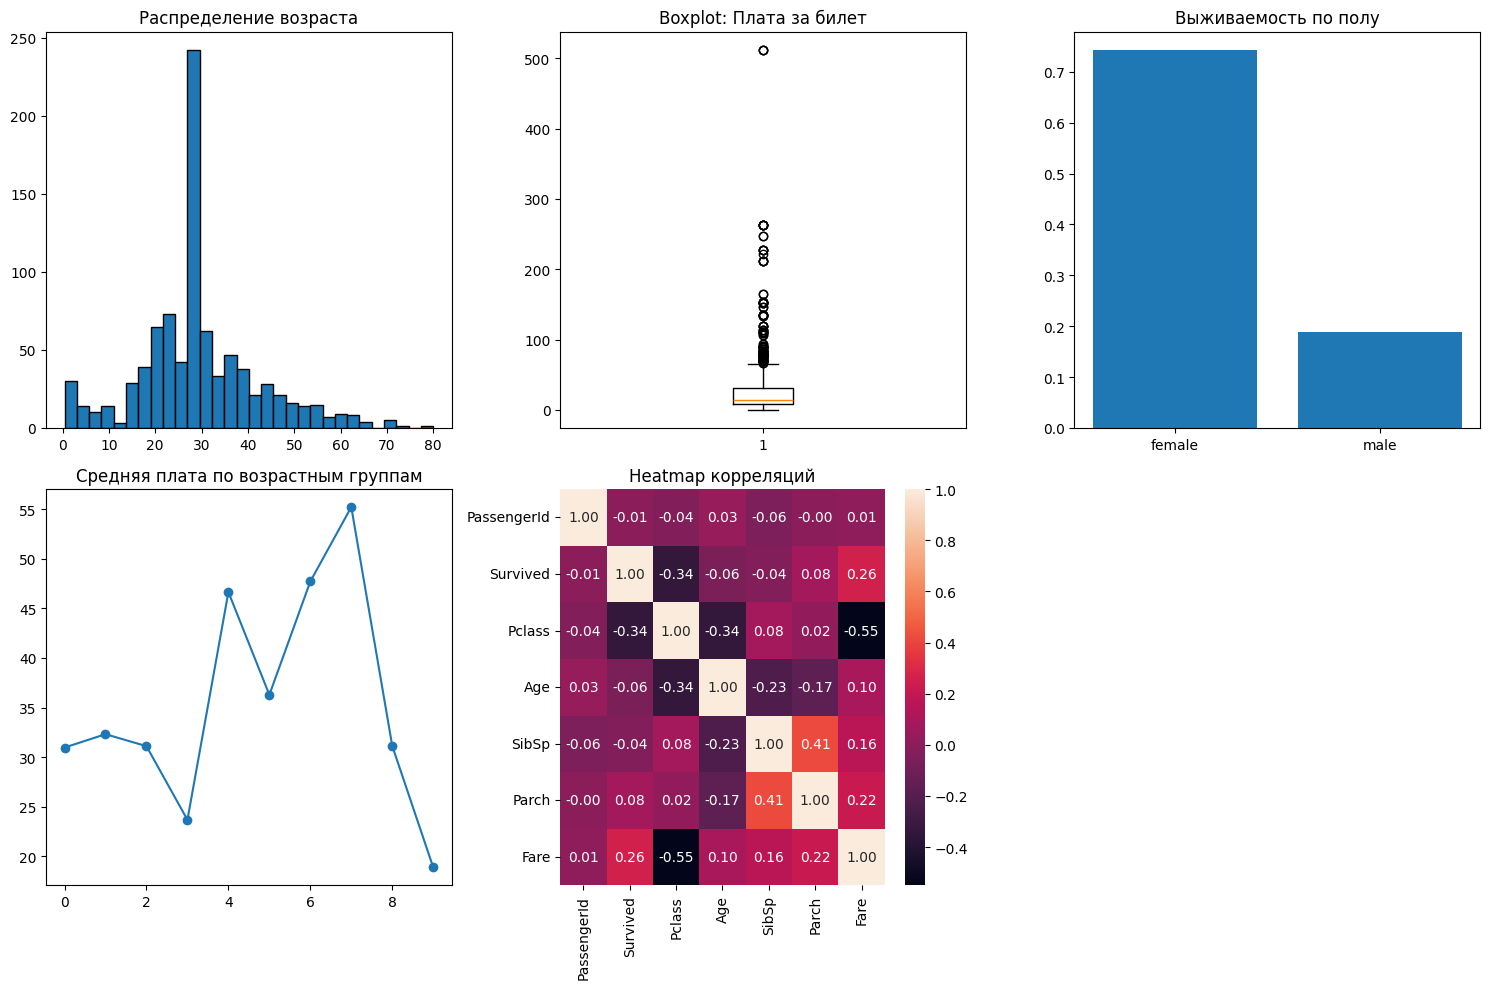


D. ГРУППИРОВКИ И АГРЕГАЦИИ

D.1 Средняя выживаемость по классам:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

D.2 Медиана возраста и средняя плата:
                Age        Fare
Sex    Pclass                  
female 1       32.5  106.125798
       2       28.0   21.970121
       3       28.0   16.118810
male   1       36.0   67.226127
       2       29.0   19.741782
       3       28.0   12.661633

D.3 Количество пассажиров по порту:
Embarked
C    168
Q     77
S    646
dtype: int64

D.4 Сводная таблица:
Sex       female      male
Pclass                    
1       0.968085  0.368852
2       0.921053  0.157407
3       0.500000  0.135447

АНАЛИЗ ЗАВЕРШЁН
Данные: (891, 12)


In [ ]:
# === 1. ИМПОРТ БИБЛИОТЕК ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# === 2. ЗАГРРУЗКА ДАННЫХ ===
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# === A. ЗАГРУЗКА И ПЕРВИЧНЫЙ ОБЗОР ===
print("="*60)
print("A. ПЕРВИЧНЫЙ ОБЗОР")
print("="*60)

print("\nA.1 Первые 3 строки:")
print(df.head(3))
print("\nA.2 Последние 3 строки:")
print(df.tail(3))
print(f"\nA.3 Структура: {df.shape[0]} строк, {df.shape[1]} столбцов")

print("\nA.4 Типы данных:")
print(df.dtypes)

# Коррекция типов (без inplace)
df = df.copy()  # Явное создание копии
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')
print("\nТипы после преобразования:")
print(df.dtypes)

# === B. ОБРАБОТКА ДАННЫХ ===
print("\n" + "="*60)
print("B. ОБРАБОТКА ДАННЫХ")
print("="*60)

# B.1 Пропущенные значения
print("\nB.1 Пропущенные значения:")
missing = df.isnull().sum()
print(missing[missing > 0])

# Заполнение пропусков (без inplace)
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Cabin'] = df['Cabin'].fillna('Unknown')

print("\nПосле заполнения пропусков:")
print(f"Всего пропусков: {df.isnull().sum().sum()}")

# B.2 Дубликаты
print(f"\nB.2 Дубликаты: {df.duplicated().sum()}")

# B.3 Выбросы (z-score для Age)
z_scores = np.abs((df['Age'] - df['Age'].mean()) / df['Age'].std())
outliers = (z_scores > 3).sum()
print(f"\nB.3 Выбросы в Age (z-score > 3): {outliers}")

# B.4 Статистики
print("\nB.4 Описательная статистика:")
print(df.describe())

print("\nУникальные значения категориальных признаков:")
for col in ['Sex', 'Embarked', 'Pclass']:
    print(f"{col}: {df[col].nunique()}")

print("\nКорреляционная матрица:")
numeric_cols = df.select_dtypes(include=[np.number]).columns
print(df[numeric_cols].corr())

# === C. ВИЗУАЛИЗАЦИЯ ===
print("\n" + "="*60)
print("C. ВИЗУАЛИЗАЦИЯ (5 графиков)")
print("="*60)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# 1. Гистограмма возраста
axes[0, 0].hist(df['Age'], bins=30, edgecolor='black')
axes[0, 0].set_title('Распределение возраста')

# 2. Boxplot платы за билет
axes[0, 1].boxplot(df['Fare'].dropna())
axes[0, 1].set_title('Boxplot: Плата за билет')

# 3. Столбчатая: выживаемость по полу (с observed=False)
survival_by_sex = df.groupby('Sex', observed=False)['Survived'].mean()
axes[0, 2].bar(survival_by_sex.index.astype(str), survival_by_sex.values)
axes[0, 2].set_title('Выживаемость по полу')

# 4. Линейный график (с observed=False)
age_groups = pd.cut(df['Age'], bins=10)
avg_fare = df.groupby(age_groups, observed=False)['Fare'].mean()
axes[1, 0].plot(range(len(avg_fare)), avg_fare.values, marker='o')
axes[1, 0].set_title('Средняя плата по возрастным группам')

# 5. Heatmap корреляций
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', ax=axes[1, 1])
axes[1, 1].set_title('Heatmap корреляций')

axes[1, 2].axis('off')
plt.tight_layout()
plt.show()

# === D. ГРУППИРОВКИ И АГРЕГАЦИИ ===
print("\n" + "="*60)
print("D. ГРУППИРОВКИ И АГРЕГАЦИИ")
print("="*60)

# 1. Средняя выживаемость по классам
print("\nD.1 Средняя выживаемость по классам:")
print(df.groupby('Pclass', observed=False)['Survived'].mean())

# 2. Медиана возраста и средняя плата
print("\nD.2 Медиана возраста и средняя плата:")
print(df.groupby(['Sex', 'Pclass'], observed=False).agg({'Age': 'median', 'Fare': 'mean'}))

# 3. Количество пассажиров
print("\nD.3 Количество пассажиров по порту:")
print(df.groupby('Embarked', observed=False).size())

# 4. Pivot table
print("\nD.4 Сводная таблица:")
pivot_table = pd.pivot_table(df, values='Survived', index='Pclass',
                            columns='Sex', aggfunc='mean', observed=False)
print(pivot_table)

print("\n" + "="*60)
print("АНАЛИЗ ЗАВЕРШЁН")
print(f"Данные: {df.shape}")
print("="*60)